<a href="https://colab.research.google.com/github/Zfeng0207/FIT3199-FYP/blob/dev%2Fzfeng/00_data_labeling_and_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Labeling and Sampling

## Data Ingestion

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
from scipy import stats
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
datetimeevents = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/datetimeevents.csv')
diagnosis = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/diagnosis.csv')
vitalsign = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/vitalsign.csv')
patient_info = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/patients.csv')

### Dataset Shapes

In [19]:
print(f'datetimeevents shape: {datetimeevents.shape}')
print(f'diagnosis shape: {diagnosis.shape}')
print(f'vitalsign shape: {vitalsign.shape}')
print(f'patient_info shape: {patient_info.shape}')

datetimeevents shape: (7112999, 10)
diagnosis shape: (899050, 6)
vitalsign shape: (1564610, 11)
patient_info shape: (299712, 6)


### Data Overview

#### vitalsign

In [20]:
vitalsign.head(5)

,subject_id,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,pain
0,10000032,32952584,2180-07-22 16:36:00,NaN,83.0,24.0,97.0,90.0,51.0,NaN,0
1,10000032,32952584,2180-07-22 16:43:00,NaN,85.0,22.0,98.0,76.0,39.0,NaN,0
2,10000032,32952584,2180-07-22 16:45:00,NaN,84.0,22.0,97.0,75.0,39.0,NaN,0
3,10000032,32952584,2180-07-22 17:56:00,NaN,84.0,20.0,99.0,86.0,51.0,NaN,NaN
4,10000032,32952584,2180-07-22 18:37:00,98.4,86.0,20.0,98.0,65.0,37.0,NaN,NaN


In [21]:
print(vitalsign.dtypes)

subject_id       int64
stay_id          int64
charttime       object
temperature    float64
heartrate      float64
resprate       float64
o2sat          float64
sbp            float64
dbp            float64
rhythm          object
pain            object
dtype: object


#### diagnosis

In [22]:
diagnosis.head(5)

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
0,10000032,32952584,1,4589,9,HYPOTENSION NOS
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS"
4,10000032,33258284,2,78959,9,OTHER ASCITES


In [23]:
print(diagnosis.dtypes)

subject_id      int64
stay_id         int64
seq_num         int64
icd_code       object
icd_version     int64
icd_title      object
dtype: object


There are a total of 13199 unique icd codes

In [24]:
diagnosis['icd_code'].nunique()

13199

In [25]:
# unique_diagnosis.to_csv('unique_diagnosis.csv', index = False)

#### datetimeevents

In [26]:
datetimeevents.head(5)

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valueuom,warning
0,10000032,29079034,39553978,66056,2180-07-23 21:02:00,2180-07-23 21:02:00,225754,2180-07-23 00:00:00,Date,0
1,10000032,29079034,39553978,66056,2180-07-23 21:02:00,2180-07-23 21:02:00,225755,2180-07-23 00:00:00,Date,0
2,10000032,29079034,39553978,88981,2180-07-23 14:24:00,2180-07-23 14:24:00,225754,2180-07-23 14:24:00,Date,0
3,10000032,29079034,39553978,88981,2180-07-23 14:24:00,2180-07-23 14:24:00,225755,2180-07-23 14:24:00,Date,0
4,10000980,26913865,39765666,36518,2189-06-27 09:13:00,2189-06-27 09:13:00,225755,2189-06-27 09:13:00,Date,0


In [27]:
print(datetimeevents.dtypes)

subject_id       int64
hadm_id          int64
stay_id          int64
caregiver_id     int64
charttime       object
storetime       object
itemid           int64
value           object
valueuom        object
warning          int64
dtype: object


#### patient_info

In [28]:
patient_info.head(5)

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN


In [29]:
print(patient_info.dtypes)

subject_id            int64
gender               object
anchor_age            int64
anchor_year           int64
anchor_year_group    object
dod                  object
dtype: object


##### Insights
**Observations**


**Key Takeaway**


## Data Labeling

Labelling target class based on the given journal:
*italicized text*
https://www.ahajournals.org/doi/10.1161/01.str.0000174293.17959.a1

- explains stroke related icd codes
- rule based risk factor
- ICD-9 Code 362 & ICD-10 Code G45 is not entirely stroke, will ignore these for now

| Stroke Type | ICD-9 Code | Definition | ICD-10 Code | Definition |
|------------|------------|-----------------------------|------------|------------------------------------------------|
| **AIS**    | 362.3      | Retinal vascular occlusion | H34.1      | Central retina artery occlusion |
|            | 433.x1     | Occlusion and stenosis of precerebral arteries | I63.x | Cerebral infarction |
|            | 434.x1     | Occlusion of cerebral arteries | I64.x | Stroke, not specified as hemorrhage or infarction |
|            | 436        | Acute, but ill-defined cerebrovascular disease |  |  |
| **ICH**    | 431.x      | Intracerebral hemorrhage | I61.x | Intracerebral hemorrhage |
| **SAH**    | 430.x      | Subarachnoid hemorrhage | I60.x | Subarachnoid hemorrhage |
| **TIA**    | 435.x      | Transient cerebral ischemia | G45.x | Transient cerebral ischemic attacks and related syndromes |


### Stroke Patients: Mapping Stroke Diseases

#### Labeling Stroke

In [30]:
import numpy as np
import pandas as pd
import re

def extract_numeric_part(icd_code):
    """
    Extracts the numeric portion of an ICD code by removing non-numeric characters.
    - Includes leading zeros.
    - Returns np.nan if the conversion fails.
    """
    numeric_part = ''.join(filter(str.isdigit, icd_code))
    try:
        return numeric_part
    except ValueError:
        return np.nan

# Define icd code numeric ranges
icd10_valid_ranges = [str(i) for i in range(60, 65)]
icd9_valid_ranges = [str(i) for i in range(430, 437)]

diagnosis_df = diagnosis.copy()

# extract numeric part of the icd code
diagnosis_df['numeric_part'] = diagnosis_df['icd_code'].apply(extract_numeric_part)



condition = (
    # ICD-10 codes
    (diagnosis_df['icd_code'].str.startswith('I')) &
    (diagnosis_df['icd_version'] == 10) &
    (diagnosis_df['numeric_part'].str[:2].isin(icd10_valid_ranges))

    |

    # ICD 9 codes
    ((diagnosis_df['icd_code'].str.startswith('H')) & (diagnosis_df['numeric_part'].str[:2] == '34')) |
    # ((diagnosis_df['icd_code'].str.startswith('G')) & (diagnosis_df['numeric_part'].str[:2] == '45')) |
    diagnosis_df['icd_code'].str.isnumeric() &  # Ensure numeric ICD codes
    (diagnosis_df['icd_version'] == 9) &  # Check if it's ICD-9
    (diagnosis_df['numeric_part'].isin(map(str,icd9_valid_ranges))
    # | (diagnosis_df['numeric_part'].str[:3] == '362')
    )
)

# commented out those two codes for now as may not be stroke

# Initialize Stroke_Y/N column with 0
diagnosis_df['Stroke_Y/N'] = 0
diagnosis_df.loc[condition, 'Stroke_Y/N'] = 1


#### Stroke Master Dataframe

In [31]:
stroke_df = diagnosis_df[diagnosis_df['Stroke_Y/N'] == 1]

Stroke_Y/N
0    895622
1      3428
Name: count, dtype: int64


<ipython-input-32-086fbe79dfbd>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=icd_counts.index, y=icd_counts.values, palette='viridis')


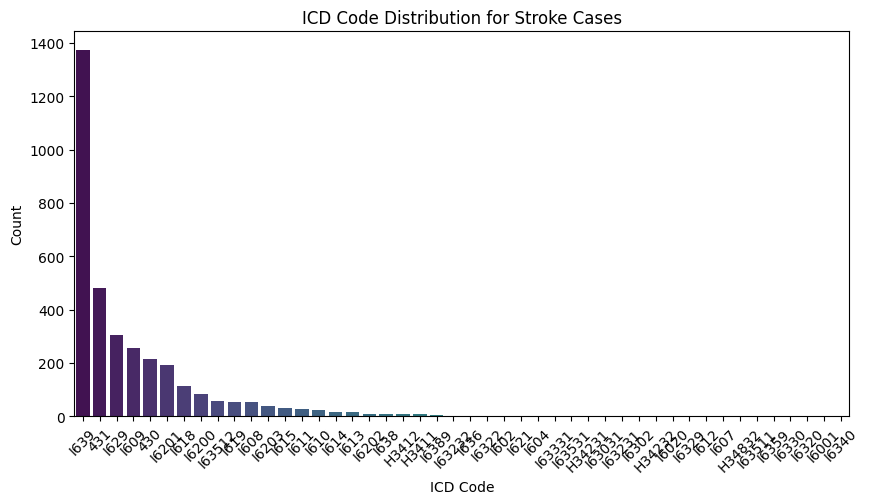

In [32]:
targets = diagnosis_df['Stroke_Y/N']

temp = targets.value_counts()
print(temp)

# Count unique ICD code occurrences
icd_counts = stroke_df['icd_code'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=icd_counts.index, y=icd_counts.values, palette='viridis')

# Add labels
plt.xlabel("ICD Code")
plt.ylabel("Count")
plt.title("ICD Code Distribution for Stroke Cases")
plt.xticks(rotation=45)  # Rotate labels for readability

# Show plot
plt.show()

#### Patients with at least one occurence of stroke

In [33]:
# Get unique subject IDs with at least one stroke occurrence
stroke_subject_ids = diagnosis_df[diagnosis_df['Stroke_Y/N'] == 1]['subject_id'].unique()

has_stroke_occurence_df = diagnosis_df[diagnosis_df['subject_id'].isin(stroke_subject_ids)]

### Merging Datasets

In [34]:
merged_vs_df = pd.merge(vitalsign, has_stroke_occurence_df, how='right', on=['subject_id','stay_id'])

In [35]:
merged_pi_df = pd.merge(merged_vs_df, patient_info, how='left', on='subject_id')

In [36]:
# Assuming 'stay_id' represents the visit order

# Sort by subject ID and stay_id
merged_pi_df.sort_values(['subject_id', 'stay_id'], inplace=True)

# Initialize counters
pattern1_count = 0
pattern2_count = 0
pattern3_count = 0
pattern4_count = 0


# Group by subject ID
for subject_id, group in merged_vs_df.groupby('subject_id'):
    stroke_occurrences = group['Stroke_Y/N'].values

    # Check for patterns and increment counters
    if 0 in stroke_occurrences and 1 in stroke_occurrences:  # Pattern 1 or 2
        if stroke_occurrences.tolist().count(1) > 1:  #more than 1 times of stroke
            pattern2_count += 1 # Pattern 2
        else:
            pattern1_count += 1 # Pattern 1

    elif all(occurrence == 1 for occurrence in stroke_occurrences) and len(stroke_occurrences) > 1: #all stroke occurences and more than 1 occurence
        pattern3_count += 1 # Pattern 3

    elif any(stroke_occurrences) and not all(stroke_occurrences): # check if subject has at least 1 stroke
      first_stroke_index = stroke_occurrences.tolist().index(1)
      if 0 in stroke_occurrences[first_stroke_index + 1:]: # check if there is no stroke after stroke
          pattern4_count += 1
          # print(f"subject id {subject_id}: Stroke then no stroke")


# Print the total counts for each pattern
print(f"Pattern 1 (Stroke after initial non-stroke visits): {pattern1_count}")
print(f"Pattern 2 (Recurrent stroke after initial non-stroke visits): {pattern2_count}")
print(f"Pattern 3 (Recurrent stroke visits): {pattern3_count}")
print(f"Pattern 4 (Stroke then no stroke): {pattern4_count}")


Pattern 1 (Stroke after initial non-stroke visits): 232
Pattern 2 (Recurrent stroke after initial non-stroke visits): 1785
Pattern 3 (Recurrent stroke visits): 1044
Pattern 4 (Stroke then no stroke): 0


#### Filter only patient records that are reccurent

In [37]:
# Count unique stay_id per subject_id
stay_counts = merged_pi_df.groupby('subject_id')['stay_id'].nunique()

# Filter to keep only subject_ids with more than one stay_id
valid_subjects = stay_counts[stay_counts > 1].index

# Filter the original DataFrame
filtered_df = merged_pi_df[merged_pi_df['subject_id'].isin(valid_subjects)]


#### Sorting Dataset by Subject, Stay and charttime

In [38]:
sorted_df = filtered_df.sort_values(by=['subject_id', 'stay_id', 'charttime'])

#### Save Dataset

In [39]:
sorted_df.to_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/00_recurrent_stroke_patient.csv', index = False)

### Aggregating Data

In [40]:
import pandas as pd

# Convert `charttime` to datetime format
sorted_df['charttime'] = pd.to_datetime(sorted_df['charttime'])

# Create a new column for the date (without time)
sorted_df['date'] = sorted_df['charttime'].dt.date

# Aggregate per patient and per day
aggregated_df = sorted_df.groupby(['stay_id', 'date']).agg({
    'temperature': ['mean', 'min', 'max', 'std'],
    'heartrate': ['mean', 'min', 'max', 'std'],
    'resprate': ['mean', 'min', 'max', 'std'],
    'o2sat': ['mean', 'min', 'max', 'std'],
    'sbp': ['mean', 'min', 'max', 'std'],
    'dbp': ['mean', 'min', 'max', 'std']
}).reset_index()

# Rename columns
aggregated_df.columns = ['_'.join(col).strip() for col in aggregated_df.columns.values]


# PLEASE IGNORE THE CODE BELOW FOR NOW

In [41]:
ERROR TO STOP THE BELOW FROM RUNNING

SyntaxError: invalid syntax (<ipython-input-41-26b0335acc4d>, line 1)

In [ ]:
shuffled_df = shuffled_df.drop(columns = ['temperature','rhythm','pain','dod'])

Interpolate missing values in vital signs


In [ ]:
shuffled_df['heartrate'].interpolate(method='linear', inplace=True)
shuffled_df['resprate'].interpolate(method='linear', inplace=True)
shuffled_df['o2sat'].interpolate(method='linear', inplace=True)
shuffled_df['sbp'].interpolate(method='linear', inplace=True)
shuffled_df['dbp'].interpolate(method='linear', inplace=True)


In [ ]:
null_values = shuffled_df.isnull().sum()
print(null_values)

In [ ]:
df_selected = shuffled_df[['heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'icd_code','icd_version', 'Stroke_Y/N', 'gender', 'anchor_age']]

In [ ]:

le = LabelEncoder()

columns_to_encode = ['icd_code']

for col in columns_to_encode:
    df_selected[col] = le.fit_transform(df_selected[col].astype(str))

In [ ]:
df_selected['gender'] = df_selected['gender'].replace({'M': 0, 'F': 1})

In [ ]:
df_selected.columns

In [ ]:


columns_to_check = ['heartrate', 'resprate', 'o2sat', 'sbp', 'dbp']

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 4, i)  # Adjust rows and columns for the subplots
    plt.boxplot(df_selected[col].dropna(), vert=False)  # Drop NaN values and plot horizontally
    plt.title(col)

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()


In [ ]:

z_scores = np.abs(stats.zscore(df_selected.select_dtypes(include=[np.number])))

outlier_threshold = 3
outliers = (z_scores > outlier_threshold)

outliers_rows = outliers.any(axis=1)


In [ ]:
df_cleaned = df_selected[~outliers_rows]


In [ ]:
df_cleaned

In [ ]:
df_cleaned.to_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/(0.1_10)_00_sampled_data.csv', index = False)